### Data Cleaning and EDA

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [23]:
df = pd.read_excel("premiums.xlsx")

In [24]:
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [25]:
df.shape


(50000, 13)

In [26]:
df.columns = df.columns.str.replace(" ",'_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

Checking for Missing Values

In [27]:
df.isnull().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

we have 50000 records out of which columns:smoking_status has 11,employment_status has 2 and income_level has 13 missing values. Since these are very small in numbers, we can prefer to delete these records from our dataframe as a part of data cleaning process.

In [28]:
df.dropna(inplace = True)
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

Checking Duplicate Values

In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
# If there would have been any duplicate values, we could handle in this way.
df.drop_duplicates(inplace=True)
df.duplicated().sum()


np.int64(0)

In [31]:
# Summarize Statistics

df.describe()


,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


There are few inconsistent data we can observe from above statistics.
1. Age: Max age 356-not realistic
2. number_of_dependants: min as -3 ,not realistic
3. income_lakhs: max as 930 lakhs, should be taken care as it may appear as outlier.

In [32]:
# Checking negative values in number_of_dependants :
df['number_of_dependants'].unique()

array([ 0,  2,  3,  4,  1,  5, -3, -1])

In [33]:
df['number_of_dependants'].value_counts()

number_of_dependants
 0    15428
 3    11006
 1     8676
 2     8418
 4     4723
 5     1653
-1       40
-3       32
Name: count, dtype: int64

In [34]:
# we can replace negative values to positive values
df['number_of_dependants'] = df['number_of_dependants'].abs()

In [35]:
df['number_of_dependants'].value_counts()

number_of_dependants
0    15428
3    11038
1     8716
2     8418
4     4723
5     1653
Name: count, dtype: int64

In [36]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.717284,23.021150,15766.810189
std,15.000378,1.491953,24.221794,8419.995271
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


### Univariate Analysis of Numeric Columns

In [37]:
numeric_col = df.select_dtypes(include=['int64','float64']).columns

In [38]:
numeric_col

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

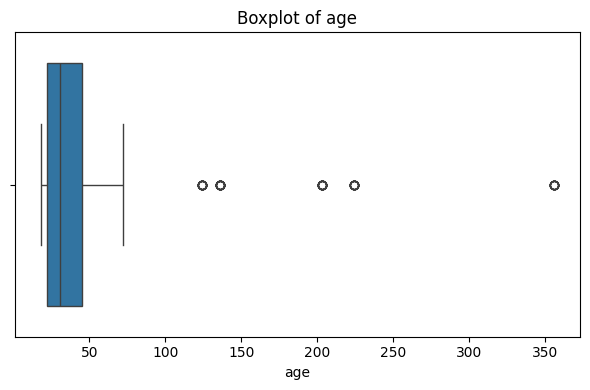

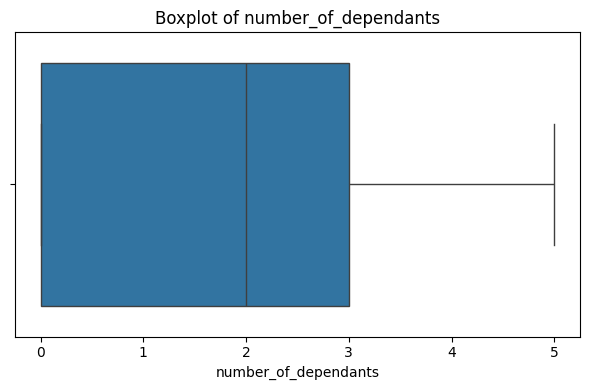

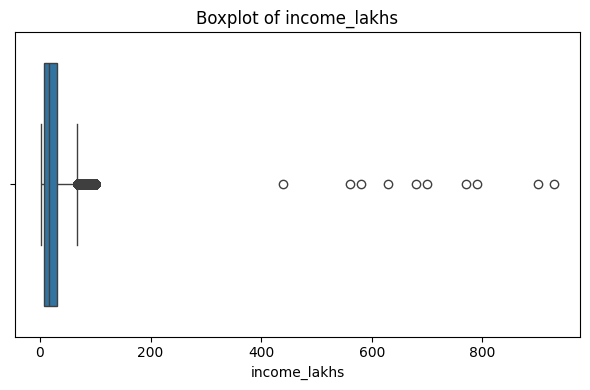

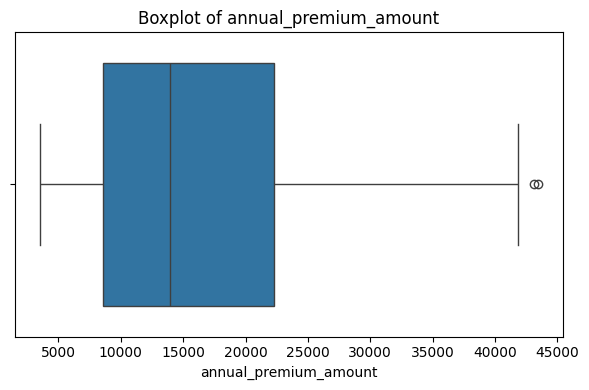

In [39]:
for col in numeric_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)                          
    plt.tight_layout()                        
    plt.savefig(f'boxplot_{col}.png')
    plt.show()

### Outlier Treatment: Age column

In [40]:
df[df['age']>100]['age'].unique()

array([224, 124, 136, 203, 356])

In [41]:
df.loc[df['age']>100,'age'].unique()

array([224, 124, 136, 203, 356])

In [42]:
#Selecting rows with age values less than or equal to 100
df1 = df[df['age']<=100]

In [43]:
df1.age.describe()

count    49918.000000
mean        34.401839
std         13.681600
min         18.000000
25%         22.000000
50%         31.000000
75%         45.000000
max         72.000000
Name: age, dtype: float64

### Outlier Treatment: Income column

In [44]:
Q1,Q3 = df1['income_lakhs'].quantile([0.25,0.75])

In [45]:
IQR = Q3-Q1

In [46]:
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

In [47]:
lower_bound,upper_bound

(-29.0, 67.0)

In [48]:
df1[df1.income_lakhs >upper_bound].shape

(3559, 13)

#The above lower and upper values donot appear to be good as income values above upper_bound are huge and if we apply IQR method to treat outliers, many records will be eliminated.
#We will apply one more approach to find upper bound.

In [49]:


upper = df1['income_lakhs'].quantile(0.999)
upper

np.float64(100.0)

In [50]:
df1[df1['income_lakhs']>upper].shape

(10, 13)

In [51]:
df2 = df1[df1['income_lakhs']<=upper].copy()

In [52]:
df2.shape

(49908, 13)

In [53]:
df2.income_lakhs.describe()

count    49908.000000
mean        22.889897
std         22.170699
min          1.000000
25%          7.000000
50%         17.000000
75%         31.000000
max        100.000000
Name: income_lakhs, dtype: float64

#### Histogram plots for Numeric Columns

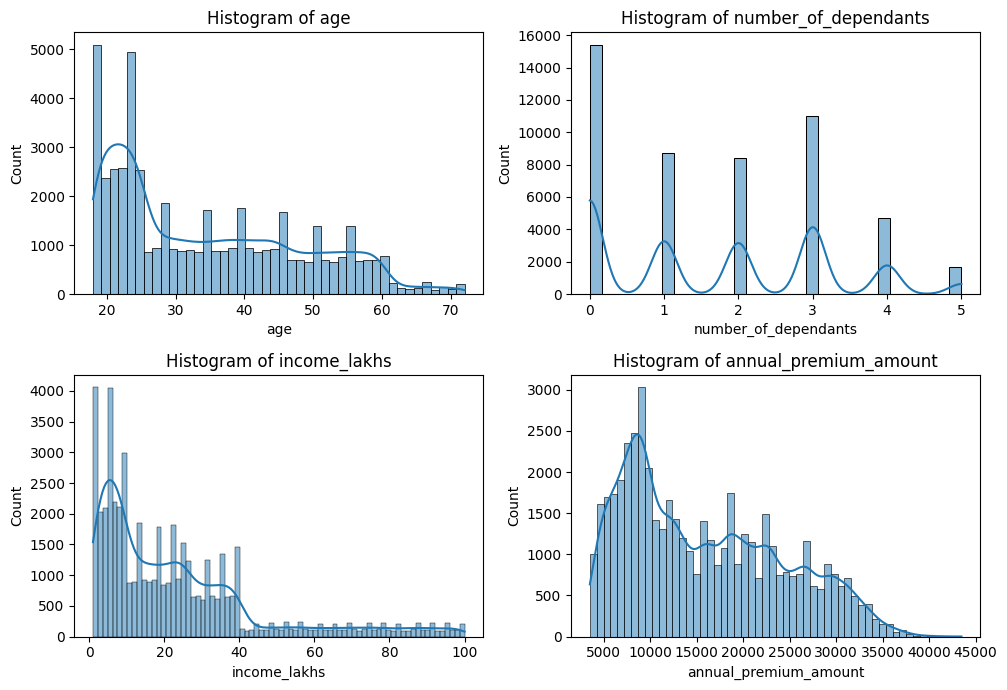

In [56]:
fig,axes = plt.subplots(2,2,figsize=(10,7))
axes = axes.flatten()
for ax,col in zip(axes,numeric_col):
    sns.histplot(df2[col],kde=True,ax=ax)
    ax.set_title(f"Histogram of {col}")

plt.tight_layout()
plt.savefig('github repository/visuals/histograms.png')
plt.show()

#### Bivariate Analysis : Numeric Columns

In [58]:

numeric_col

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

In [59]:
numeric_features = ['age', 'number_of_dependants', 'income_lakhs']


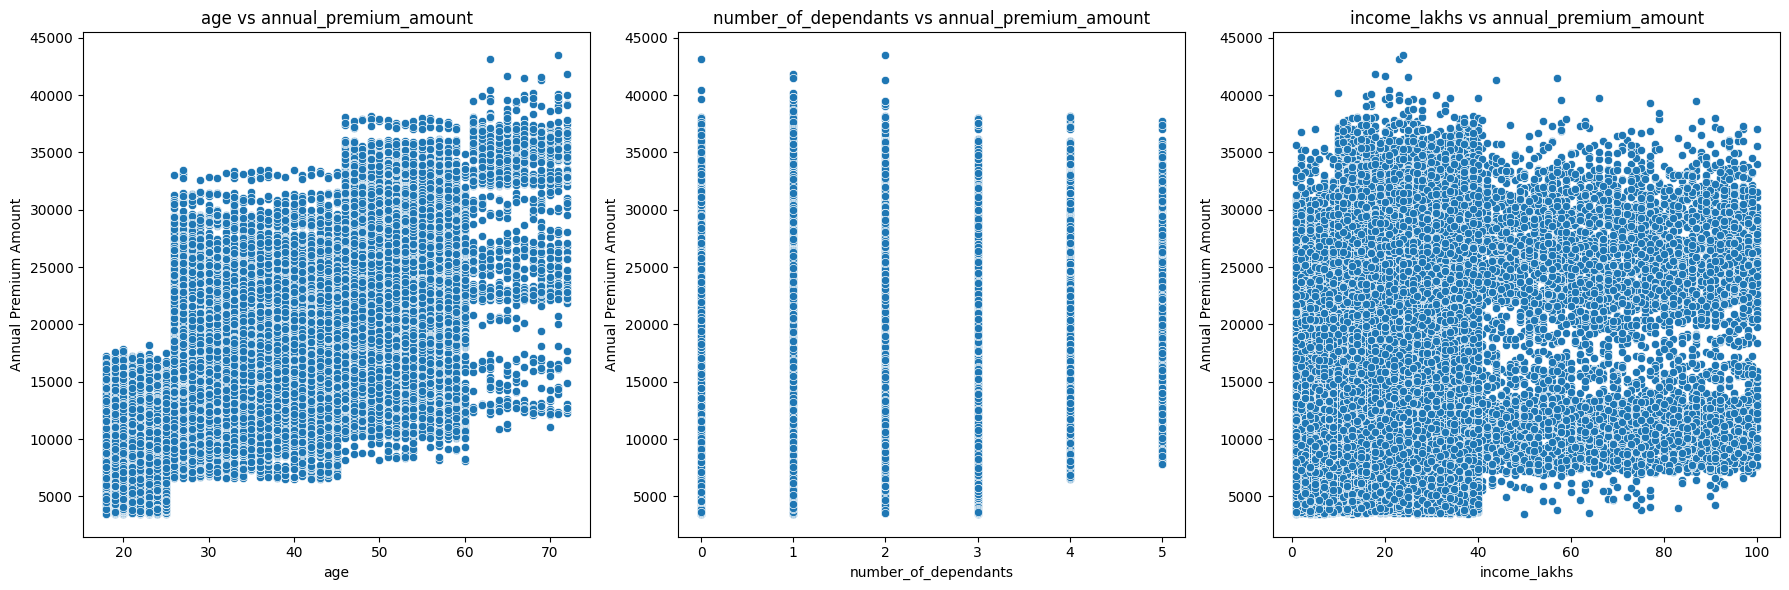

In [60]:
#sns.scatterplot(x=df2.age,y=df2.annual_premium_amount)

fig,axes = plt.subplots(
    ncols = len(numeric_features),
    nrows =1,
    figsize=(18,6)
)
for ax,col in zip(axes,numeric_features):
    sns.scatterplot(x=df2[col],y=df2['annual_premium_amount'],ax=ax)
    ax.set_title(f"{col} vs annual_premium_amount")
    ax.set_xlabel(f"{col}")
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  
plt.savefig('github repository/visuals/scatter_plots.png')
plt.show()

### Analysis of Categorical Columns

In [61]:
cat_col = df2.select_dtypes(exclude=['int64','float64']).columns

In [62]:
for col in cat_col:
    print(col,':',df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [63]:
df2['smoking_status'].replace({'Smoking=0':'No Smoking','Does Not Smoke':'No Smoking','Not Smoking':'No Smoking'},inplace=True)
df2['smoking_status'].unique()


C:\Users\Ashok\AppData\Local\Temp\ipykernel_45008\3374630219.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({'Smoking=0':'No Smoking','Does Not Smoke':'No Smoking','Not Smoking':'No Smoking'},inplace=True)


array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

#### Univariate Analysis: Categorical Columns

In [64]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [65]:
cat_col

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [66]:
count_gender = df['gender'].value_counts(normalize=True)

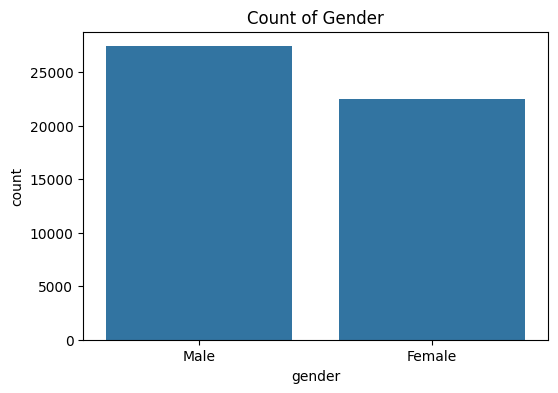

In [68]:
plt.figure(figsize=(6,4))
sns.countplot(data=df2,x='gender')
plt.title('Count of Gender')
plt.savefig('github repository/visuals/Gender_count.png')
plt.show()

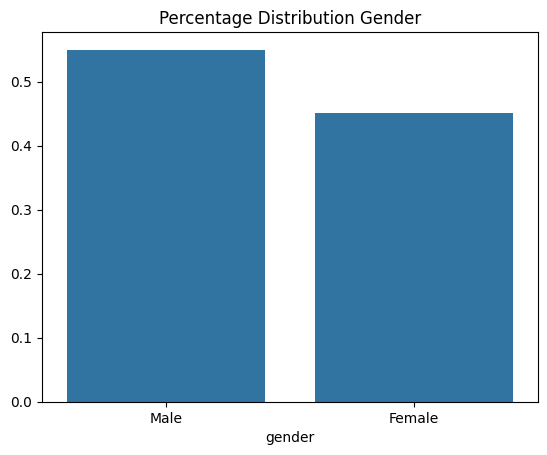

In [69]:
sns.barplot(x=count_gender.index,y=count_gender.values)
plt.title('Percentage Distribution Gender')
plt.savefig('github repository/visuals/Gender_percentage.png')

plt.show()

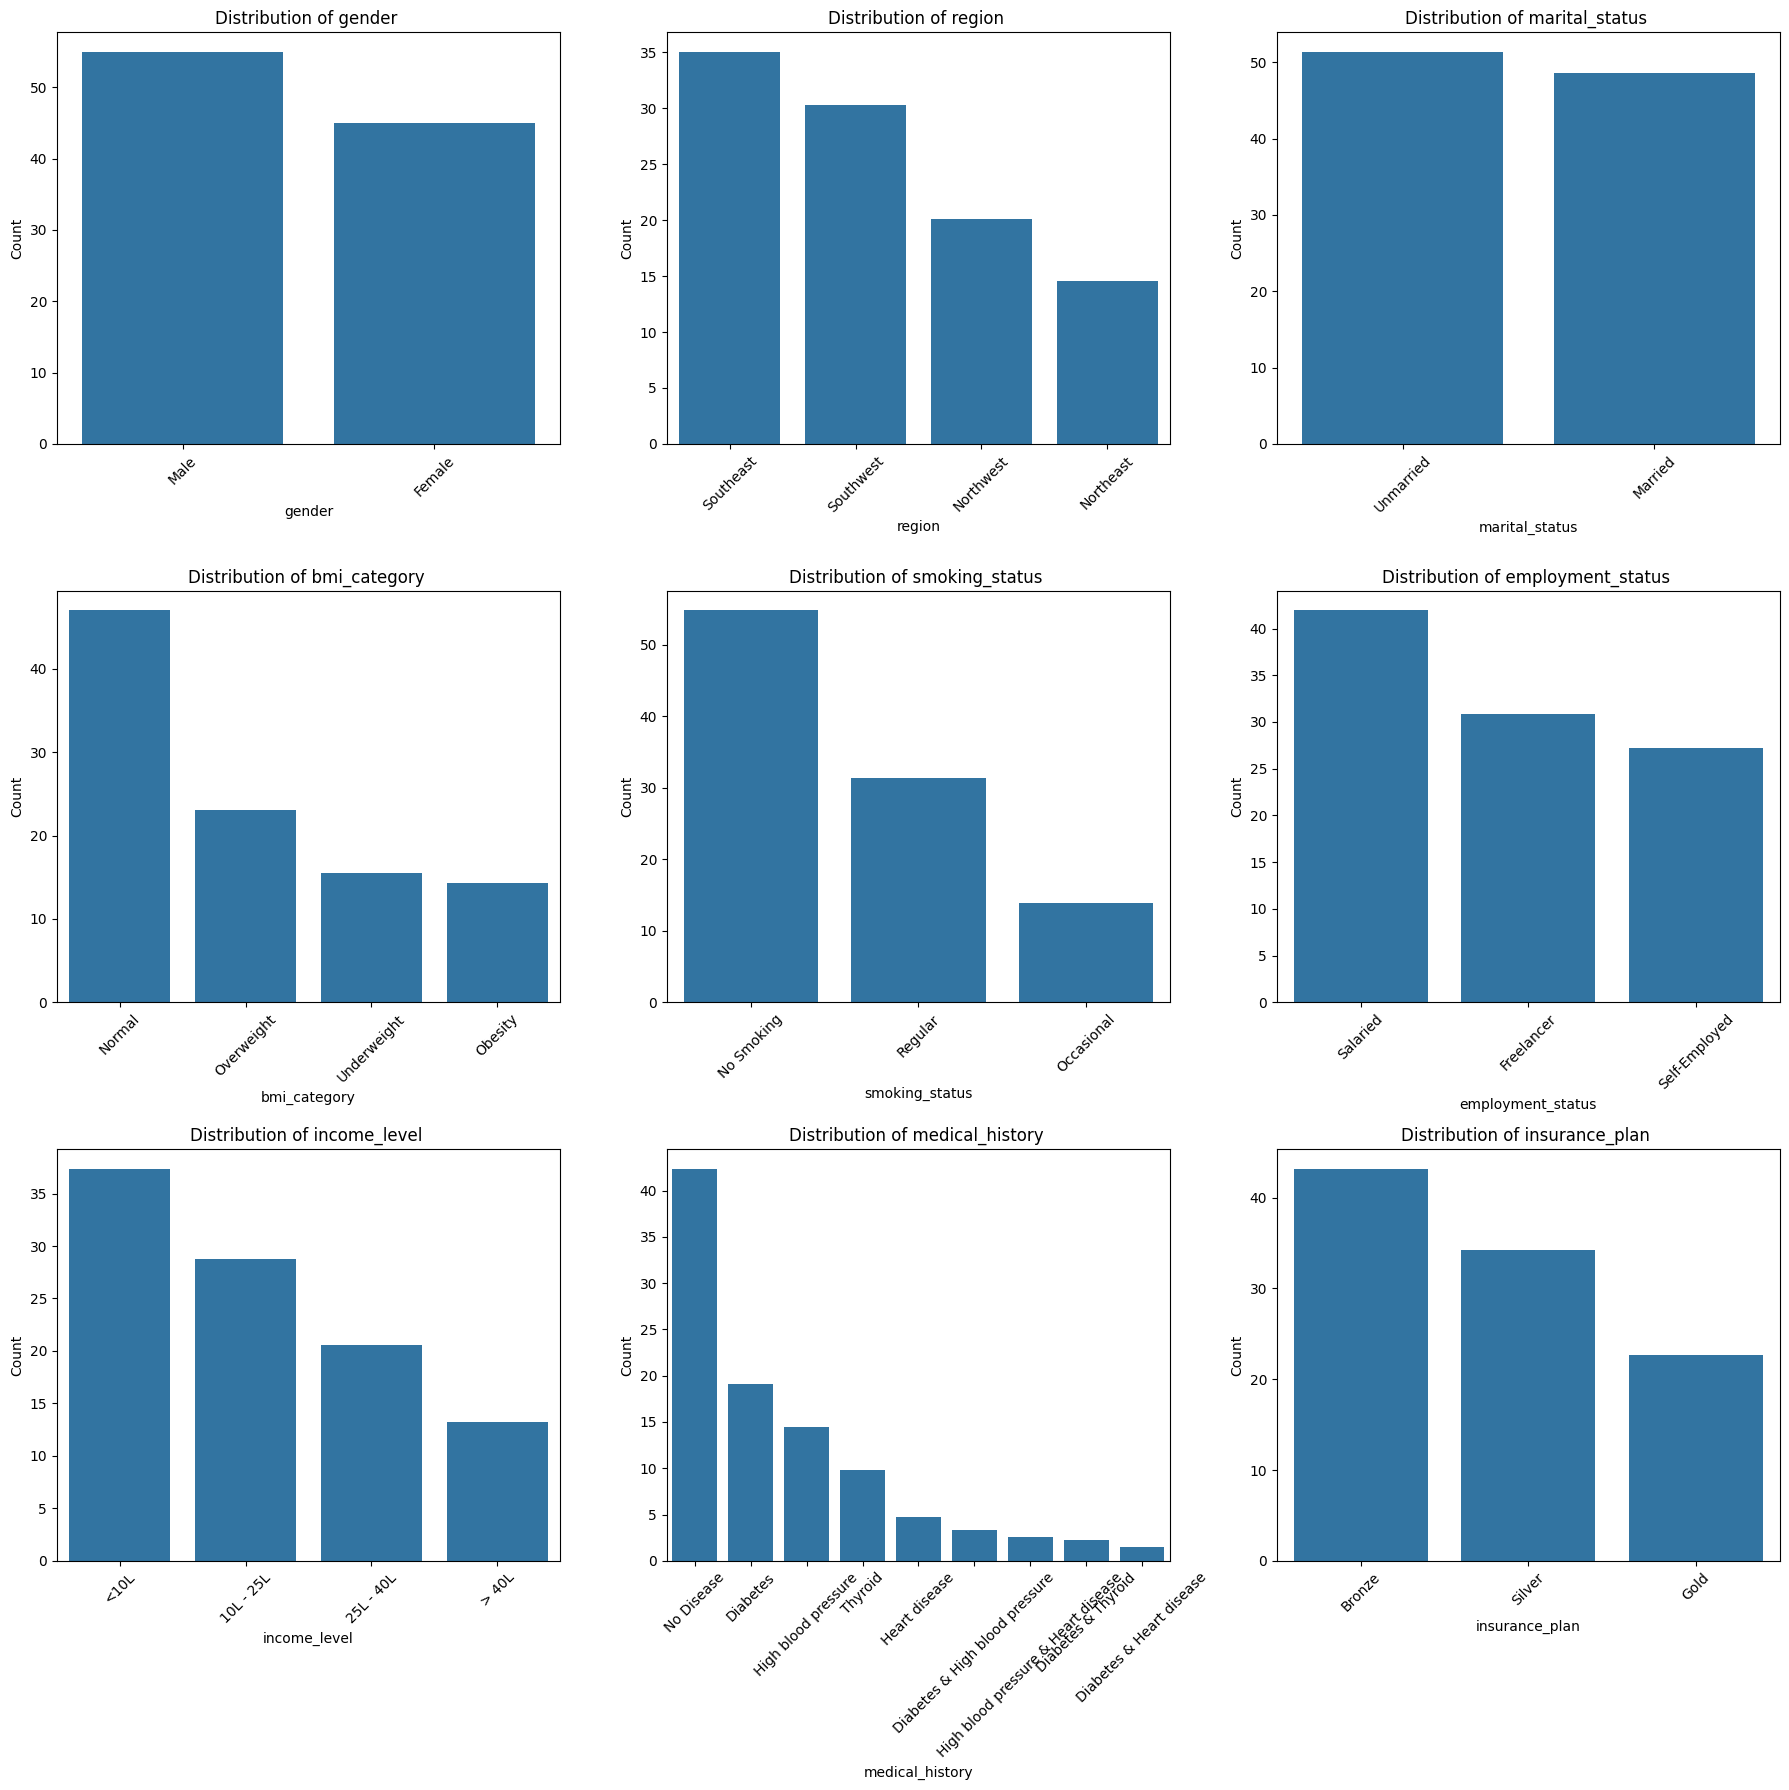

In [73]:
n=len(cat_col)
col=3
row=3
fig,axes = plt.subplots(row,col,figsize=(18,18))
axes = axes.flatten()

for ax,c in zip(axes,cat_col):
    cat_counts = df2[c].value_counts(normalize=True)*100
    sns.barplot(x=cat_counts.index,y=cat_counts.values,ax=ax)
    ax.set_title(f"Distribution of {c} ")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig(f'github repository/visuals/Barplots_categorical_columns.png')
plt.show()

#### Bivariate Analysis:Categorical Columns

In [74]:
cat_col

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [75]:
ct = pd.crosstab(df['income_level'],df['insurance_plan'])
ct

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,5314,3886,5189
25L - 40L,3686,2844,3753
<10L,12239,931,5495
> 40L,330,3662,2647


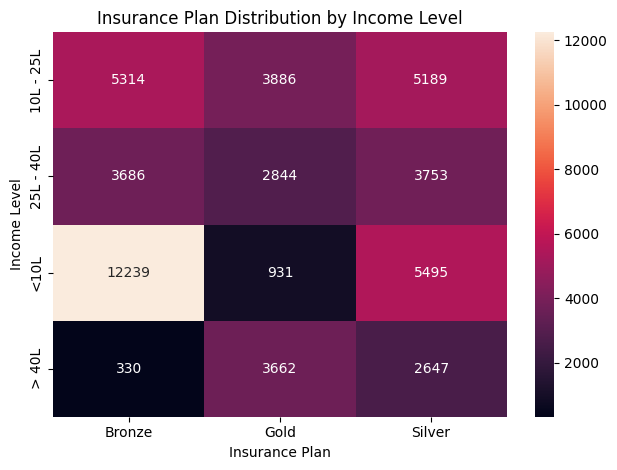

In [76]:
sns.heatmap(ct,annot=True,fmt='d')
plt.title('Insurance Plan Distribution by Income Level')
plt.xlabel('Insurance Plan')
plt.ylabel('Income Level')

plt.tight_layout()
plt.savefig('github repository/visuals/insurance_plan_heatmap.png')

plt.show()

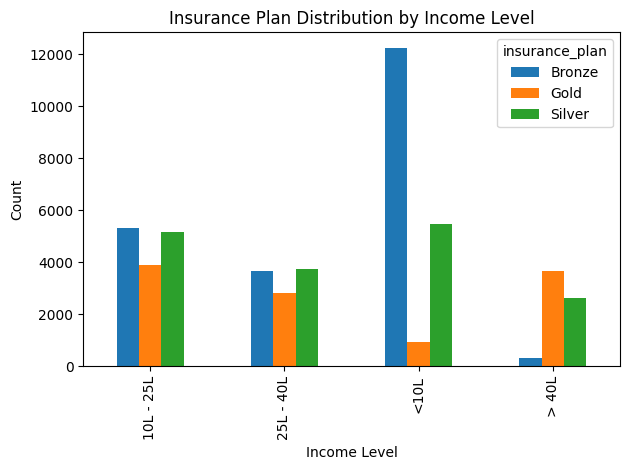

In [78]:
ct.plot(kind='bar')
plt.title('Insurance Plan Distribution by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('github repository/visuals/insurance_plan_Count_Income_levels.png')

plt.show()

In [79]:
ct_mar_status = pd.crosstab(df['marital_status'],df['insurance_plan'])
ct_mar_status

insurance_plan,Bronze,Gold,Silver
marital_status,,,
Married,6685,7916,9703
Unmarried,14884,3407,7381


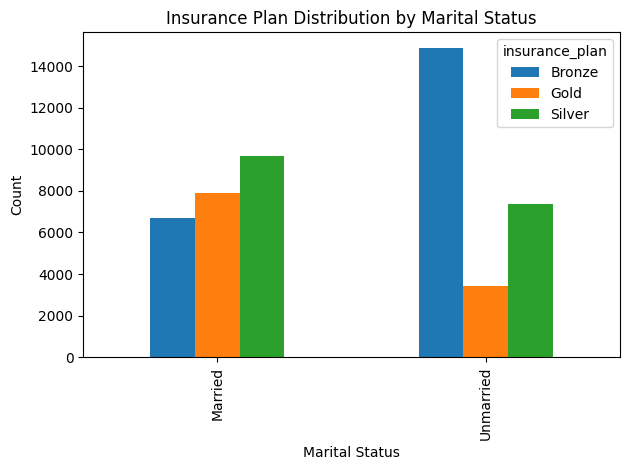

In [80]:
ct_mar_status.plot(kind='bar')
plt.title('Insurance Plan Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('github repository/visuals/insurance_plan_Count_Marital_Status.png')

plt.show()

In [81]:
ct_region = pd.crosstab(df['region'],df['insurance_plan'])
ct_region

insurance_plan,Bronze,Gold,Silver
region,,,
Northeast,3130,1624,2525
Northwest,4363,2258,3422
Southeast,7548,4035,5931
Southwest,6528,3406,5206


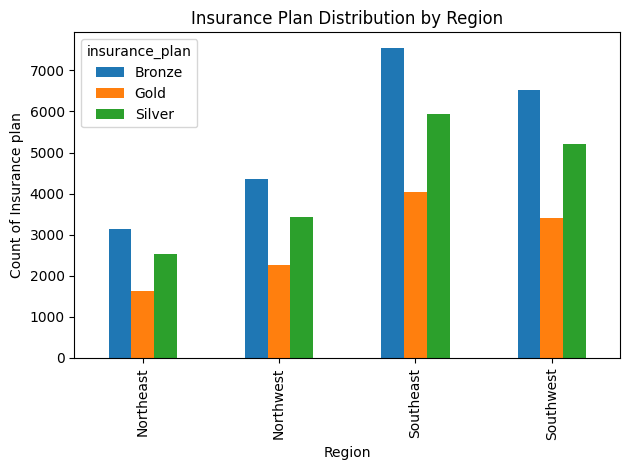

In [82]:
ct_region.plot(kind='bar')
plt.title('Insurance Plan Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count of Insurance plan')

plt.tight_layout()
plt.savefig('github repository/visuals/insurance_plan_Count_Regions.png')

plt.show()

### Feature Engineering

##### Ecoding text columns

In [83]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339


In [84]:
df2['insurance_plan'].unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [85]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1, 'Silver':2, 'Gold':3})
df2['insurance_plan'].unique()

array([1, 2, 3])

#### Risk Score for each medical condition

In [86]:
df2['medical_history'].unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [87]:
#  columns : income_level,insurance_plan

df2['income_level'].unique()
df2['income_level'] = df2['income_level'].map({'<10L': 1, '10L - 25L':2, '> 40L':4, '25L - 40L':3})
df2['income_level'].head()

0    1
1    1
2    2
3    4
4    4
Name: income_level, dtype: int64

In [88]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}



In [89]:
df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(2)

C:\Users\Ashok\AppData\Local\Temp\ipykernel_45008\2771222051.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
C:\Users\Ashok\AppData\Local\Temp\ipykernel_45008\2771222051.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,diabetes,none,6,0.428571


Nominal categorical Data: ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status'] We will use one-hot encoding to convert these categorical data into numerical data

In [90]:
nom_cat_data = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(data = df2, columns=nom_cat_data,drop_first=True)

In [91]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49908 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              49908 non-null  int64  
 1   number_of_dependants             49908 non-null  int64  
 2   income_level                     49908 non-null  int64  
 3   income_lakhs                     49908 non-null  int64  
 4   medical_history                  49908 non-null  object 
 5   insurance_plan                   49908 non-null  int64  
 6   annual_premium_amount            49908 non-null  int64  
 7   disease1                         49908 non-null  object 
 8   disease2                         49908 non-null  object 
 9   total_risk_score                 49908 non-null  int64  
 10  normalized_risk_score            49908 non-null  float64
 11  gender_Male                      49908 non-null  bool   
 12  region_Northwest       

#### Selection of Features

In [92]:
df4 = df3.drop(['medical_history','disease1', 'disease2', 'total_risk_score'], axis=1)
df4.head(3) 

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,True,True,False,False,True,False,False,False,False,False,True,False
1,29,2,1,6,1,16339,0.428571,False,False,True,False,False,True,False,False,False,True,True,False
2,49,2,2,20,2,18164,0.428571,False,False,False,False,False,False,False,False,False,False,False,True


In [93]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49908 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              49908 non-null  int64  
 1   number_of_dependants             49908 non-null  int64  
 2   income_level                     49908 non-null  int64  
 3   income_lakhs                     49908 non-null  int64  
 4   insurance_plan                   49908 non-null  int64  
 5   annual_premium_amount            49908 non-null  int64  
 6   normalized_risk_score            49908 non-null  float64
 7   gender_Male                      49908 non-null  bool   
 8   region_Northwest                 49908 non-null  bool   
 9   region_Southeast                 49908 non-null  bool   
 10  region_Southwest                 49908 non-null  bool   
 11  marital_status_Unmarried         49908 non-null  bool   
 12  bmi_category_Obesity   

We will find all boolean columns and convert them to integers in order to have smooth functioning of ML model

In [95]:
bool_col = df4.select_dtypes(include='bool').columns
df4[bool_col] = df4[bool_col].astype(int)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49908 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              49908 non-null  int64  
 1   number_of_dependants             49908 non-null  int64  
 2   income_level                     49908 non-null  int64  
 3   income_lakhs                     49908 non-null  int64  
 4   insurance_plan                   49908 non-null  int64  
 5   annual_premium_amount            49908 non-null  int64  
 6   normalized_risk_score            49908 non-null  float64
 7   gender_Male                      49908 non-null  int64  
 8   region_Northwest                 49908 non-null  int64  
 9   region_Southeast                 49908 non-null  int64  
 10  region_Southwest                 49908 non-null  int64  
 11  marital_status_Unmarried         49908 non-null  int64  
 12  bmi_category_Obesity   

#### Multicollinearity Check: VIF

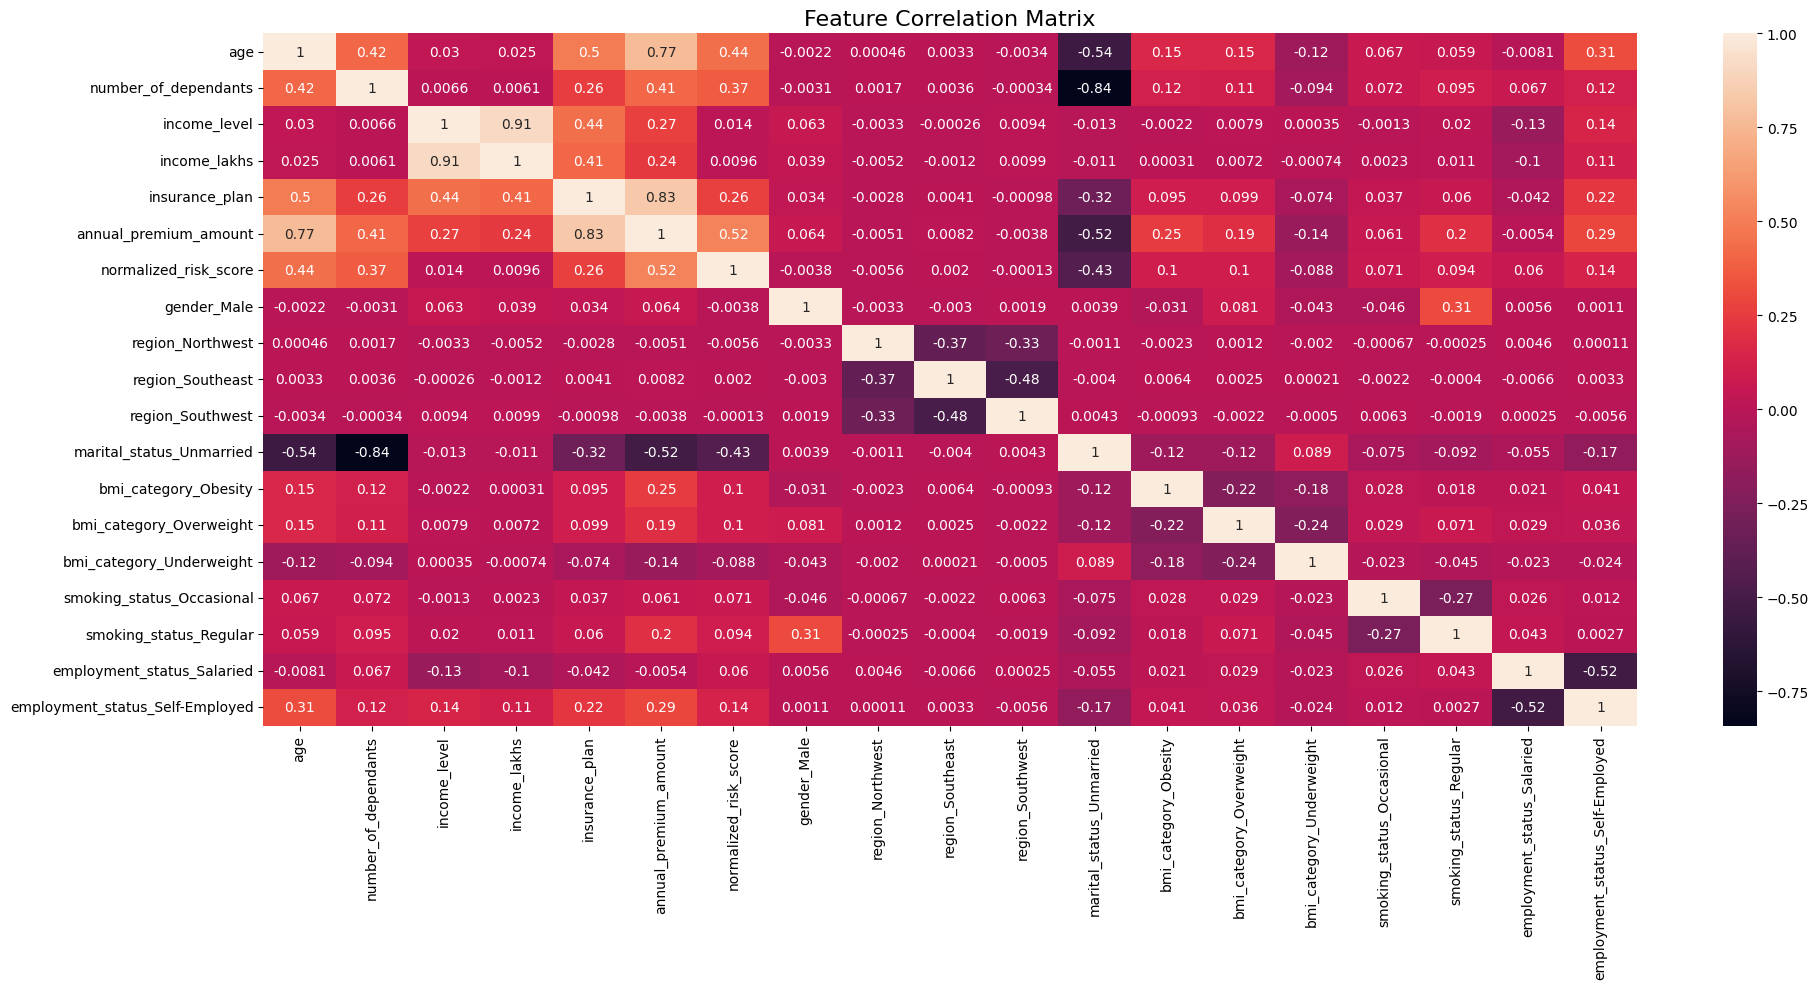

In [97]:
# Correlation matrix
plt.figure(figsize=(20,10))
cm = df4.corr()
sns.heatmap(cm,annot=True)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()

plt.savefig('github repository/visuals/correlation_heatmap.png')

plt.show()

##### Scaling the data to range 0 to 1

In [98]:
x= df4.drop('annual_premium_amount',axis = 'columns')
y = df4['annual_premium_amount']
from sklearn.preprocessing import MinMaxScaler
col_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
scaler = MinMaxScaler()

x[col_to_scale] = scaler.fit_transform(x[col_to_scale])
x.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.365900,0.221110,0.397401,0.291831,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.349711,0.223946,0.392459,0.287420,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.161616,0.500000,0.357143,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.303030,0.500000,0.428571,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
# VIF calculation

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    
    vif_df = pd.DataFrame()
    vif_df['columns'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return(vif_df)

In [100]:
calculate_vif(x)

,columns,VIF
0,age,4.567634
1,number_of_dependants,4.534650
2,income_level,12.450675
3,income_lakhs,11.183367
4,insurance_plan,3.584752
5,normalized_risk_score,2.687610
6,gender_Male,2.421496
7,region_Northwest,2.102556
8,region_Southeast,2.922414
9,region_Southwest,2.670666


In [101]:
calculate_vif(x.drop("income_level", axis="columns"))


,columns,VIF
0,age,4.545825
1,number_of_dependants,4.526598
2,income_lakhs,2.480563
3,insurance_plan,3.445682
4,normalized_risk_score,2.687326
5,gender_Male,2.409980
6,region_Northwest,2.100789
7,region_Southeast,2.919775
8,region_Southwest,2.668314
9,marital_status_Unmarried,3.393718


After droping 'income_level' column , VIF improved significantely. so we will drop the 'income_level' column from the dataframe.

In [102]:
x_reduced = x.drop("income_level", axis="columns")

### Model Training

In [103]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
x_train,x_test,y_train,y_test = train_test_split(x_reduced,y,test_size = 0.30,random_state = 10)

In [104]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (34935, 17)
y_train: (34935,)
x_test: (14973, 17)
y_test: (14973,)


### Linear" Regression Model

In [105]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [106]:
model_linear.score(x_test,y_test)

0.9280547230217837

In [107]:
model_linear.score(x_train,y_train)

0.9282143576916762

In [108]:
y_predict = model_linear.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
r2_score=r2_score(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}\nRoot Mean Squared Error: {rmse}")

Mean Squared Error: 5165611.913027984
Root Mean Squared Error: 2272.7982561212916


In [109]:
np.set_printoptions(suppress=True, precision=6)
model_linear.coef_

array([11160.926462,  -676.443991,  -514.229816, 12557.012936,
        4810.357702,   168.646662,   -35.719292,    39.96513 ,
         -24.652929,  -935.760611,  3387.911455,  1599.362268,
         391.171304,   735.912278,  2234.804712,   155.984674,
         415.903973])

##### Feature Importance Analysis

In [110]:
feature_imp = model_linear.coef_

coef_df = pd.DataFrame(feature_imp,index=x_train.columns,columns = ['Coefficients']).sort_values(ascending = True,by='Coefficients')

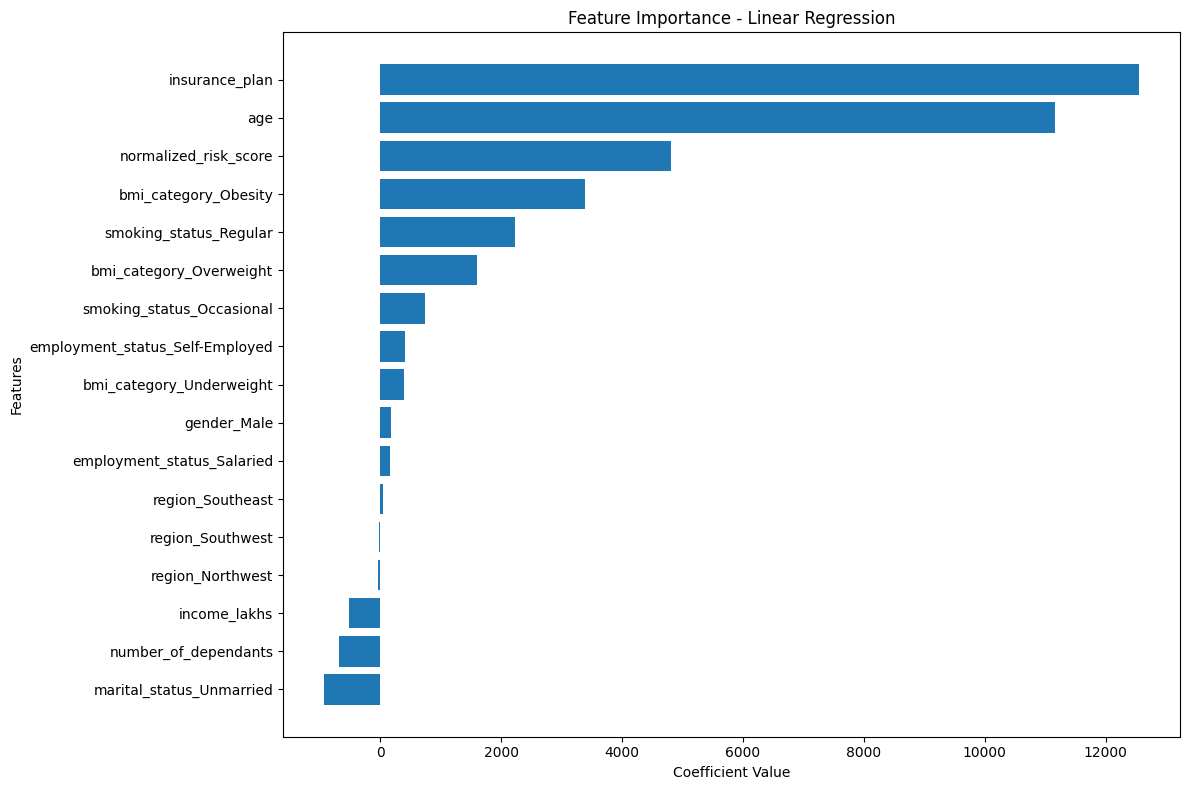

In [111]:
plt.figure(figsize=(12,8))
plt.barh(coef_df.index,coef_df['Coefficients'])
plt.title("Feature Importance - Linear Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")

plt.tight_layout()

plt.savefig('github repository/visuals/linear_regression_feature_importance.png')

plt.show()

#### Ridge Regression Model

In [112]:
from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(x_train,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [113]:
model_ridge.score(x_test,y_test),model_ridge.score(x_train,y_train)

(0.9280541644640345, 0.9282143198366275)

In [114]:
y_predict_ridge = model_ridge.predict(x_test)
mse_ridge = mean_squared_error(y_test,y_predict)
rmse_ridge = np.sqrt(mse_ridge)
print(f"For Ridge Reg Mod,Mean Squared Error: {mse_ridge}\nRoot Mean Squared Error: {rmse_ridge}")

For Ridge Reg Mod,Mean Squared Error: 5165611.913027984
Root Mean Squared Error: 2272.7982561212916


### XGBOOST Model

In [115]:
import xgboost as xgb

In [116]:
model_xgb= xgb.XGBRegressor(n_estimators = 20,max_depth=3)
model_xgb.fit(x_train,y_train)
model_xgb.score(x_test,y_test)

0.9782300591468811

In [117]:
y_predict_xgb = model_xgb.predict(x_test)
mse_xgb = mean_squared_error(y_test,y_predict_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print(f"For XGB Reg Mod,Mean Squared Error: {mse_xgb}\nRoot Mean Squared Error: {rmse_xgb}")

For XGB Reg Mod,Mean Squared Error: 1563064.0
Root Mean Squared Error: 1250.2255796455295


##### Tuning and evaluating an XGBoost regression model using cross-validation

In [118]:
model_xgb = xgb.XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)
random_search.best_score_

np.float64(0.9809474547704061)

In [119]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [120]:
best_model = random_search.best_estimator_

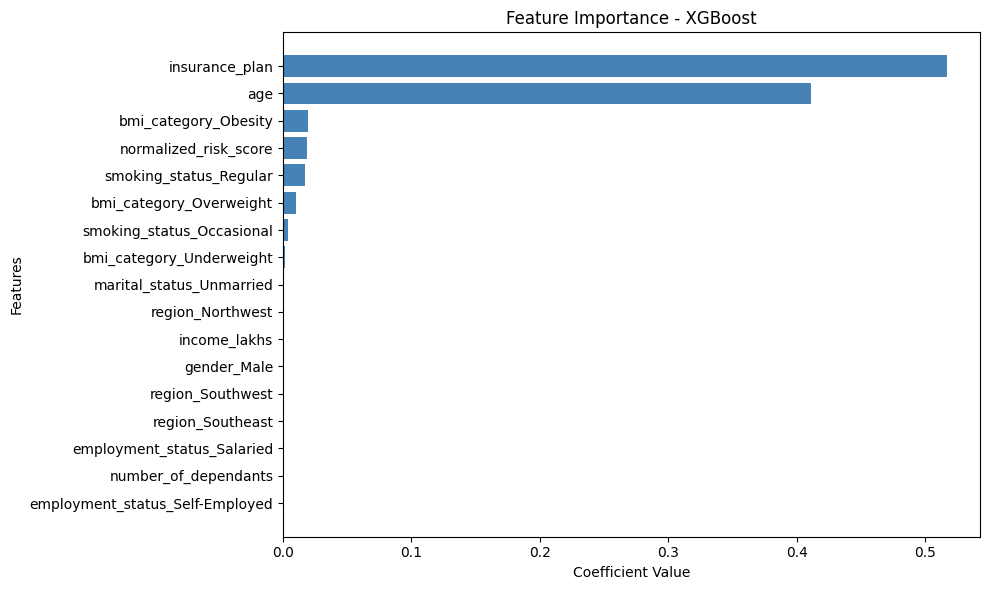

In [122]:
feature_importance = best_model.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=x_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance - XGBoost')

plt.tight_layout()

plt.savefig('github repository/visuals/xgboost_feature_importance.png')

plt.show()

##### Calculation of prediction error and percentage error

In [124]:
y_predict_best = best_model.predict(x_test)

residuals = y_predict_best - y_test
residuals_pct = (residuals/y_test)*100

result_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_predict_best,
    'diff': residuals,
    'diff_pct': residuals_pct
        })
result_df.head()

,actual,predicted,diff,diff_pct
3598,20554,20334.953125,-219.046875,-1.065714
35794,29647,29378.779297,-268.220703,-0.904714
43608,20560,20618.185547,58.185547,0.283004
42730,5018,7352.829590,2334.829590,46.529087
18936,8929,8203.291992,-725.708008,-8.127540


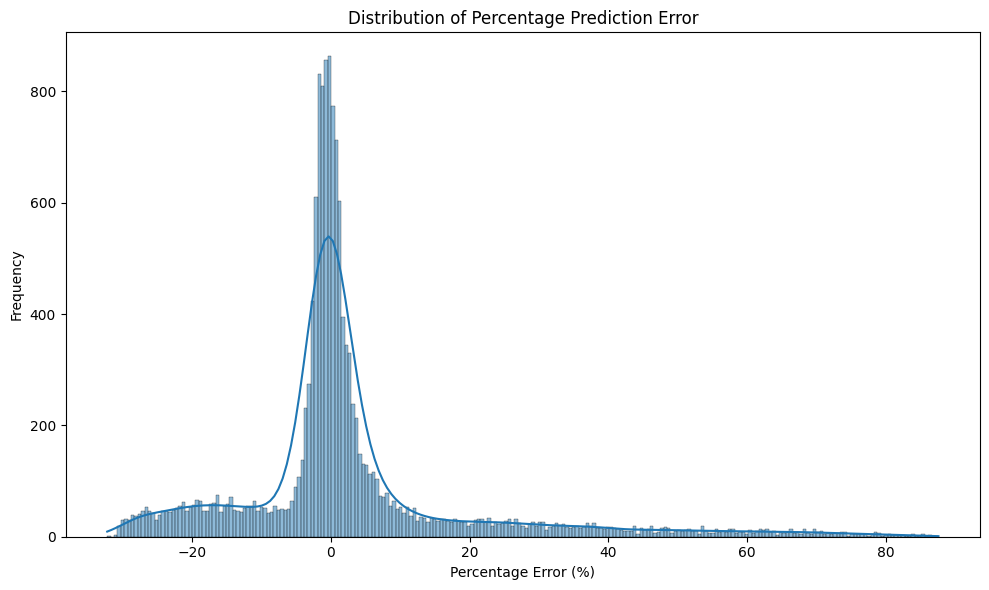

In [125]:
plt.figure(figsize=(10, 6))

sns.histplot(result_df['diff_pct'],kde = True)

plt.title('Distribution of Percentage Prediction Error')
plt.xlabel('Percentage Error (%)')
plt.ylabel('Frequency')

plt.tight_layout()

plt.savefig('github repository/visuals/percentage_error_distribution.png')

plt.show()

As per business requrement, Any prediction with more than ±10% error is considered “extreme” i.e 

Errors within ±10% → acceptable.

Errors beyond ±10% → problematic.
We will find the records where prediction error is greater than 10%.

In [128]:
extreme_error_threshold = 10 # (Assumption that the threshold for error is 10% as per discussion with business team)
extreme_result_df = result_df[np.abs(result_df['diff_pct']) > extreme_error_threshold]
extreme_result_df.shape

(4487, 4)

There are 4,487 records where the prediction error exceeds ±10%. For 4,487 cases, the model’s predictions deviate from the actual values by more than 10%, which is beyond the acceptable tolerance defined by the business.

##### Calculating the percentage of test predictions whose error exceeds ±10%

In [129]:
#What percentage of test predictions have more than 10% error

extreme_test_error_pct = (extreme_result_df.shape[0]/x_test.shape[0])*100
extreme_test_error_pct

29.967274427302478

Approximately 30% of predictions deviate from the actual values by more than 10%, which exceeds the tolerance level agreed with the business team.
Approximately 30% of customers' premium prediction is going to vary more than 10% i.e either overcharged or undercharged by more than 10%.


##### Finding the records where prediction error is greater than 50%.

In [132]:
extreme_result_df[np.abs(extreme_result_df['diff_pct']) > 50].sort_values("diff_pct",ascending = False)

,actual,predicted,diff,diff_pct
36269,3501,6565.852051,3064.852051,87.542189
48801,3516,6565.852051,3049.852051,86.742095
42342,3521,6565.852051,3044.852051,86.476911
18564,3523,6565.852051,3042.852051,86.371049
7988,3527,6565.852051,3038.852051,86.159684
...,...,...,...,...
32671,4656,6994.980957,2338.980957,50.235845
14798,4371,6565.852051,2194.852051,50.213957
13736,4371,6565.852051,2194.852051,50.213957
10107,4710,7073.240723,2363.240723,50.174962


There are 549 customers whose predicted charges deviate by more than 50%

Although the model demonstrates a high overall accuracy of 98%, nearly 30% of test predictions deviate by more than 10%, indicating areas of concern. Further analysis is needed to improve reliability.

##### Selecting the input features for only the extreme-error cases from test dataset

In [136]:
extreme_error_df = x_test.loc[extreme_result_df.index]
extreme_error_df.head(5)

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
42730,0.092593,0.2,0.131313,0.0,0.428571,1,0,0,0,1,0,1,0,0,0,0,0
20029,0.018519,0.2,0.030303,0.0,0.000000,0,1,0,0,1,0,0,1,0,0,1,0
4294,0.000000,0.2,0.020202,0.0,0.000000,1,0,0,1,1,0,1,0,0,0,0,0
44419,0.055556,0.0,0.242424,0.0,0.000000,0,0,0,0,1,0,0,1,0,0,0,0
6707,0.111111,0.2,0.070707,0.5,0.000000,1,0,0,0,1,0,0,1,0,0,0,0


##### Comparing feature distributions for cases with extreme prediction errors vs the overall test set, feature by feature

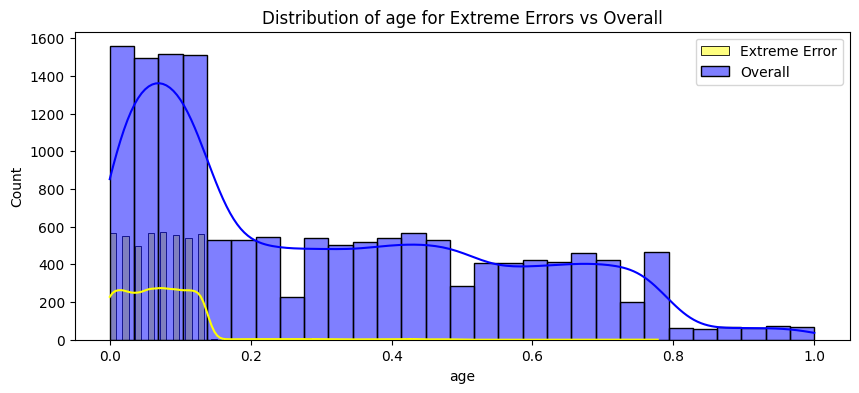

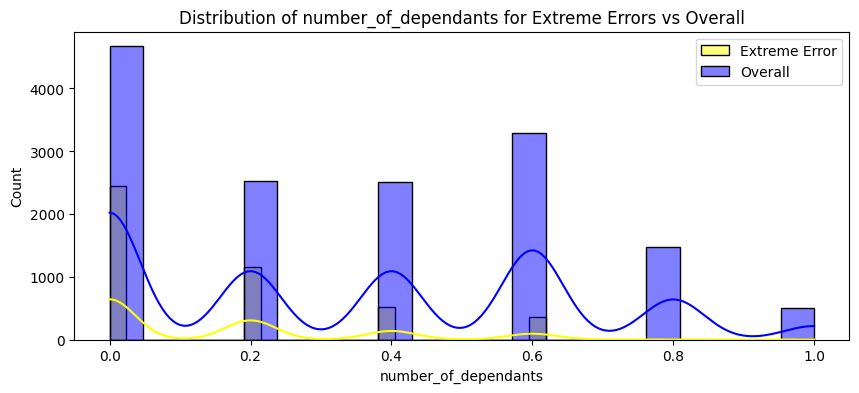

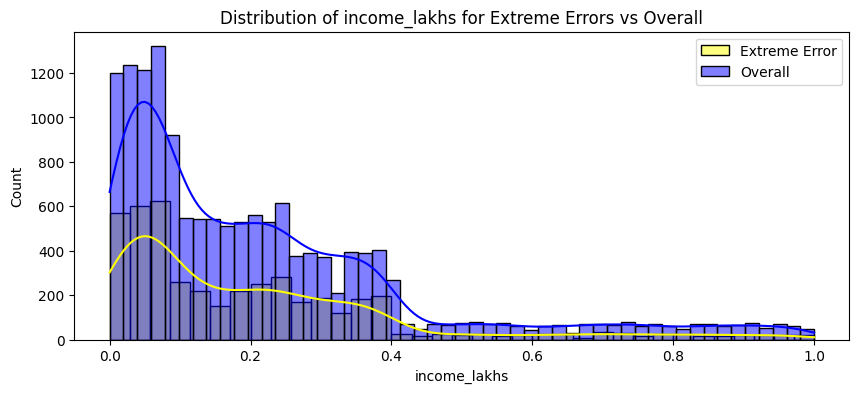

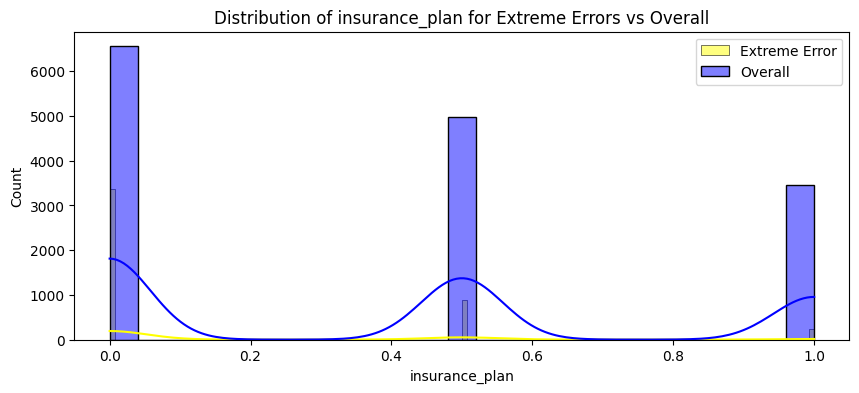

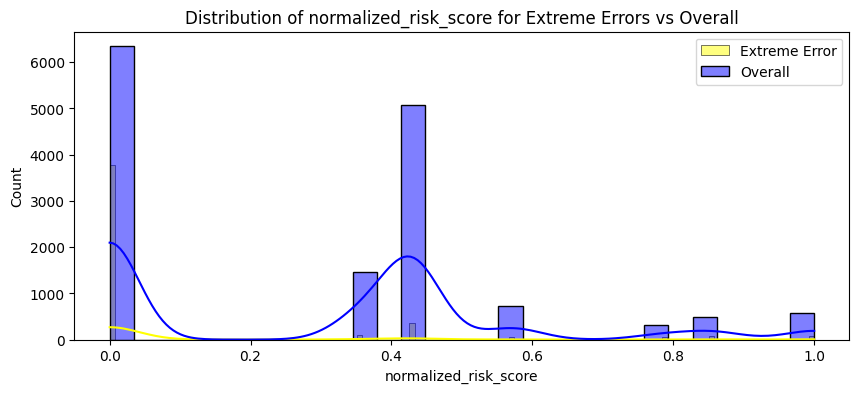

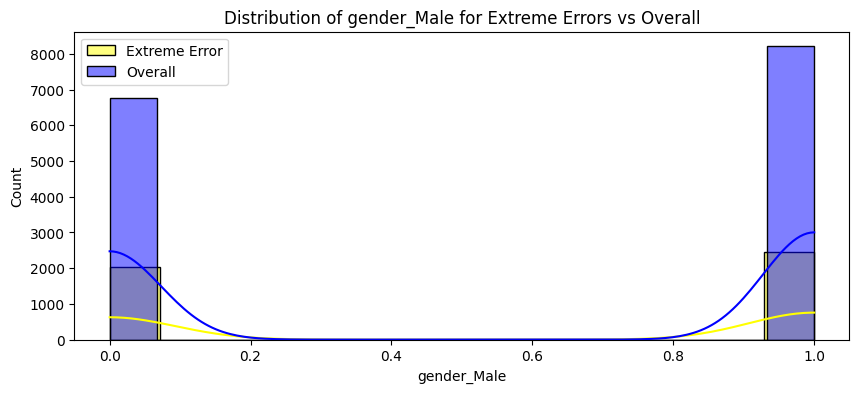

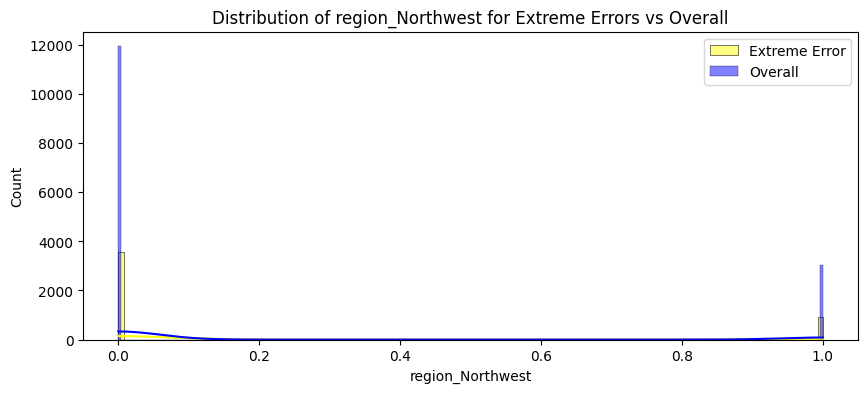

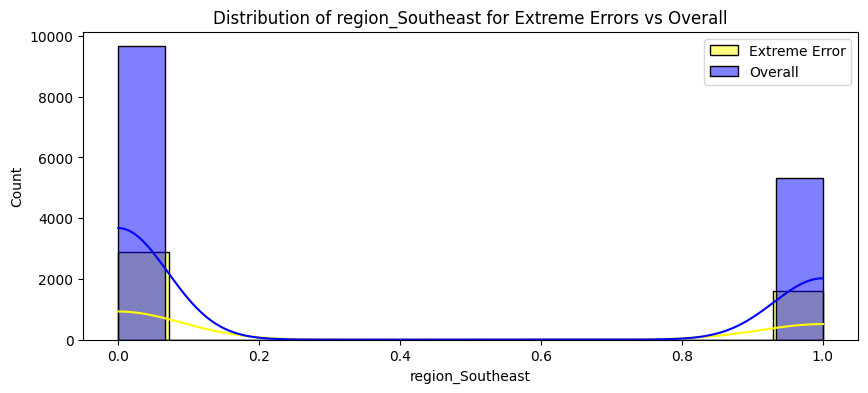

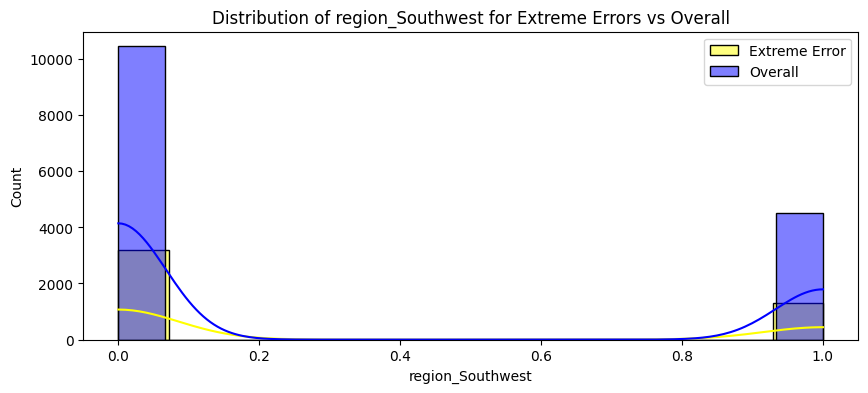

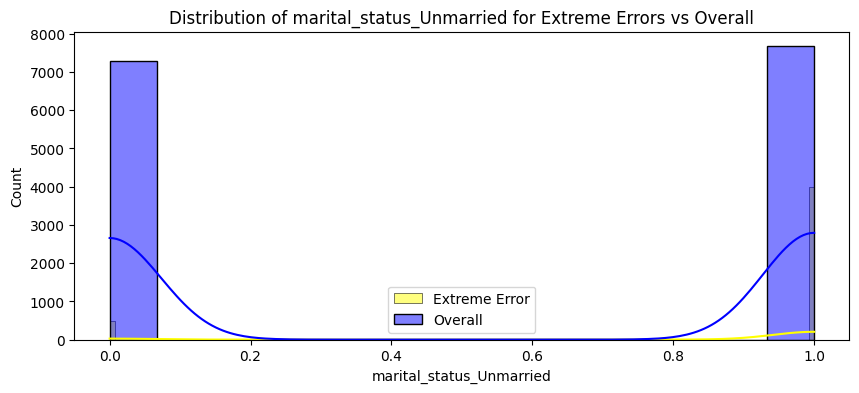

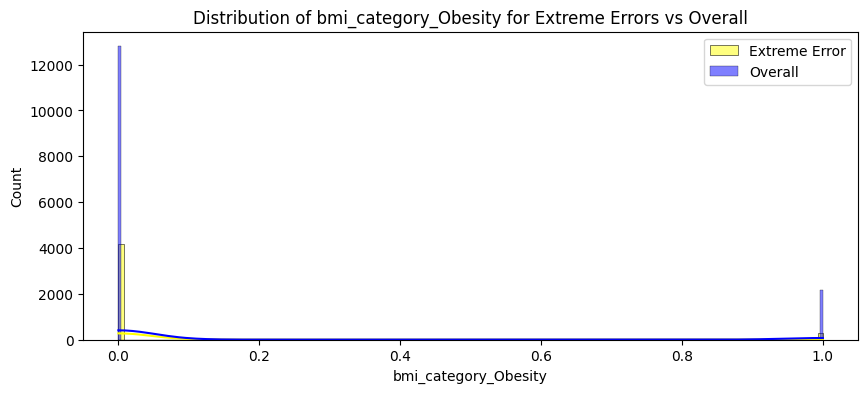

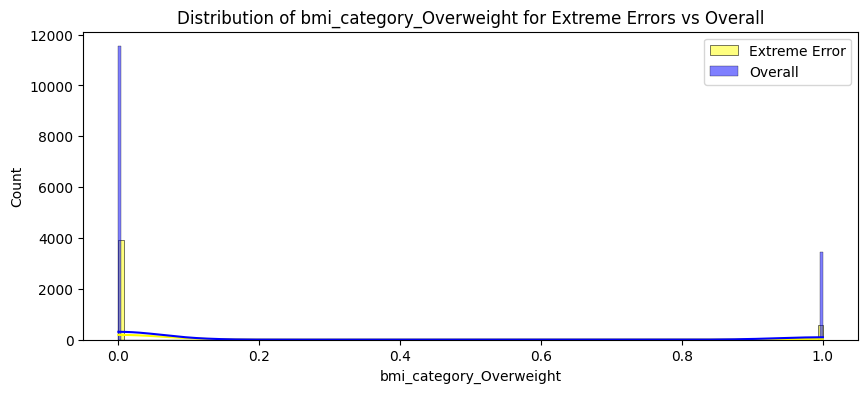

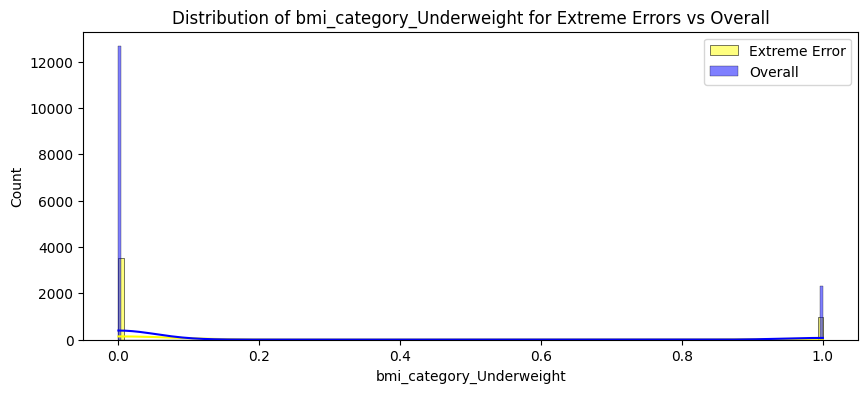

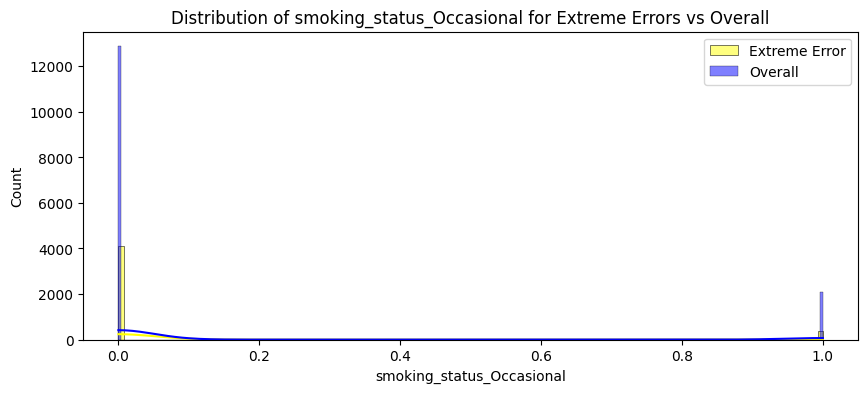

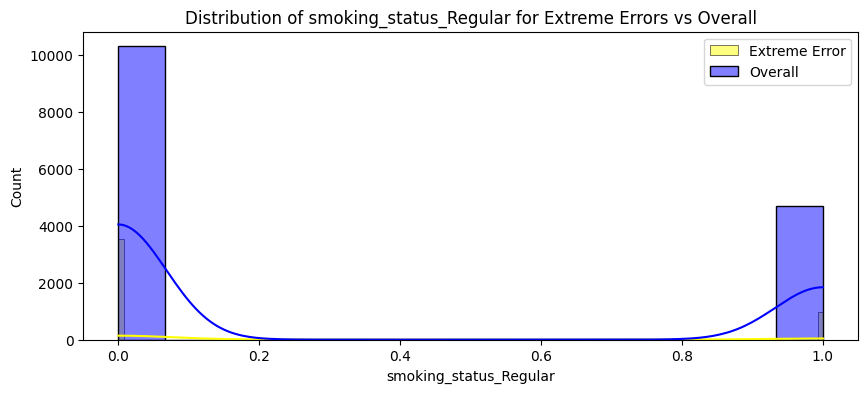

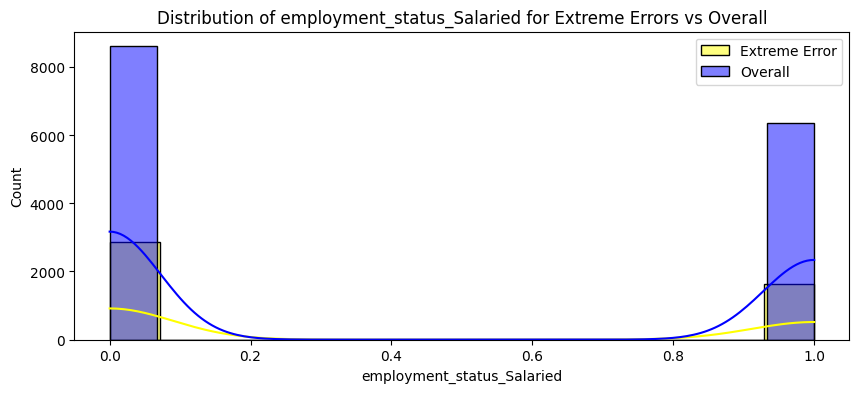

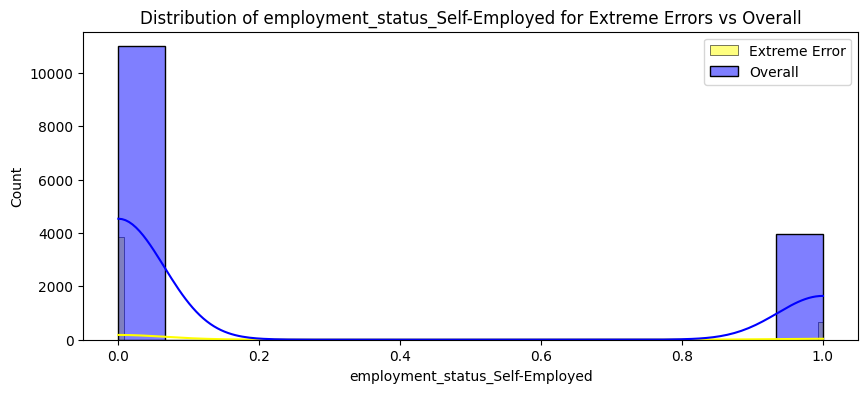

In [137]:
for features in x_test.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(extreme_error_df[features],color='yellow',label='Extreme Error',kde = True)
    sns.histplot(x_test[features], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {features} for Extreme Errors vs Overall')

    plt.savefig(f'github repository/visuals/extreme_vs_overall_{features}.png')
    plt.show()

Distribution of age for Extreme Errors vs Overall seems unusual so we will inspect them further

#### Reverse Scaling

In [138]:
extreme_error_df['income_level']=-1 #(as we had dropped income_level column earlier so its needs to be available in order to perform reverse scaling) 

In [139]:
df_reversed = pd.DataFrame()
df_reversed[col_to_scale] = scaler.inverse_transform(extreme_error_df[col_to_scale])

In [140]:
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,23.0,1.0,-2.0,14.0,1.0
1,19.0,1.0,-2.0,4.0,1.0
2,18.0,1.0,-2.0,3.0,1.0
3,21.0,0.0,-2.0,25.0,1.0
4,24.0,1.0,-2.0,8.0,2.0


In [141]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,4487.000000,4487.000000,4487.0,4487.000000,4487.000000
mean,21.804992,0.739247,-2.0,21.182527,1.302429
std,3.172355,0.968855,0.0,20.598596,0.563135
min,18.000000,0.000000,-2.0,1.000000,1.000000
25%,20.000000,0.000000,-2.0,6.000000,1.000000
50%,22.000000,0.000000,-2.0,15.000000,1.000000
75%,24.000000,1.000000,-2.0,30.000000,1.000000
max,60.000000,5.000000,-2.0,100.000000,3.000000


##### Distribution of ages for the extreme-error cases

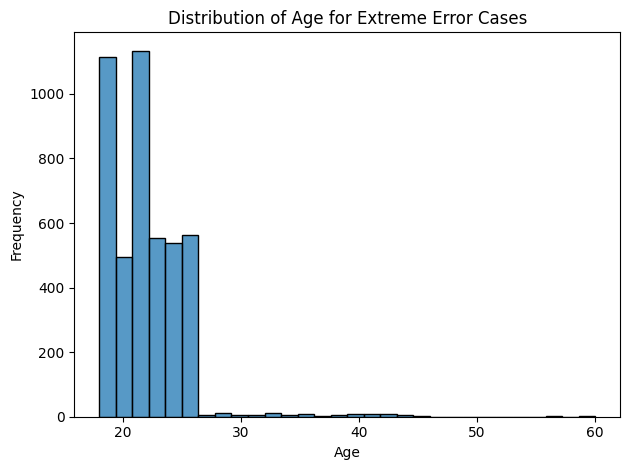

In [143]:
sns.histplot(df_reversed.age,bins=30)
plt.title('Distribution of Age for Extreme Error Cases')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()

plt.savefig('github repository/visuals/age_distribution_extreme_errors.png')

plt.show()

From the age distribution of extreme-error cases, it is clear that the majority of high-error predictions are concentrated among customers aged 25 or younger. This suggests that the model is less reliable for this segment. To address this, we will develop a dedicated model for this age group to improve prediction accuracy.